# Levelable - Data Analysis

A file to do some basic data wrangling on the data generated by `levelable_main.ipynb`.

In [3]:
# Load some relevant packages
import pandas as pd
import numpy as np

from sage.graphs.independent_sets import IndependentSets
from sage.graphs.graph_input import from_graph6

###### Some functions for convenience:

In [62]:
# is_levelable()
# Check whether a graph is levelable. Takes either a graph6 string or graph object.
# If verbose = True, print the associated data with that graph

def is_levelable(g6s, verbose = False):
    
    if isinstance(g6s, basestring):
        # Read the string and produce the graph
        g = Graph()
        from_graph6(g, g6s)
    else:
        g = g6s
           
    indSets = IndependentSets(g, maximal = True)
    t = len(list(indSets))
    
    # Grab the number of vertices
    n = len(g.vertices())

    # Prepare matrices
    A = np.zeros((t-1, n))
    B = np.zeros((t-1, 1))

    # Iterate through all the facets of the independence complex
    for j in range(0,t-1):

        # Grab facet j
        Fj = list(indSets)[j]

        # Grab facet j + 1
        Fj1 = list(indSets)[j+1]


        # Iterate through every vertex of the facet j
        for k in range(0, len(Fj)):

            # Add 1 to these spots in the matrix
            A[j, Fj[k]] = A[j, Fj[k]] + 1

        # Iterate through every vertex of the facet j + 1
        for k in range(0, len(Fj1)):

            # Subtract 1 to these spots in the matrix
            A[j, Fj1[k]] = A[j, Fj1[k]] - 1

        # Other side of the equation - set the j-th entry 
        B[j, 0] = len(Fj) - len(Fj1)
    
    p = MixedIntegerLinearProgram(maximization = False, solver = "GLPK")
    x = p.new_variable()
    
    for l in range(n):
        p.set_min(x[l], 2)
    
    for l in range(t-1):
        # Add a constraint according to the i^th equation
        p.add_constraint(sum(A[l,j]*x[j] for j in range(n)) == B[l])
    
    try:
        # Print data if verbose
        if (verbose):

            g.show()
            print "Independent Sets"
            print list(indSets)
            
            print
            print "Matrix A"
            print A
    
            print
            print "B"
            print B
            
        # Solve the system
        p.solve()
        
    except:

        if (verbose):
            print 
            print "No solution found"
        return False
    else:  
        
        if (verbose):
            print
            s = p.get_values([x[r] for r in range(n)])
        
            print "Solution"
            print s
            
        return True

In [75]:
# g6_show()
# Show a graph from a graph6 string

def g6_show(string):
    g = Graph()
    from_graph6(g, string)
    g.show()

## Enumerating levelable graphs

In [67]:
# Results over how many vertices?
minVertices = 5
maxVertices = 9

vertices = range(minVertices, maxVertices)

resultsHead = list([["Vertices", "Levelable", "Total graphs"]])
results = list()

for n in vertices:
    # Read the .csv
    df = pd.read_csv("results/results" + str(n) + ".csv")
    
    # Count the number of total graphs in the .csv
    countAll = df.shape[0]
    
    # Count the number of levelable in the .csv
    countLev = df[df.levelable == "T"].shape[0]
    
    results.append([n, countLev, countAll])

print pd.DataFrame(data = np.array(results), columns =resultsHead)

   Vertices  Levelable  Total graphs
0         5         33            34
1         6        140           156
2         7        793          1044
3         8       6962         12346


## Smallest non-levelable graph
By inspection, there is only one graph on 5 vertices that is not levelable. 

In [109]:
df5 = pd.read_csv("results/results5.csv")

print df5[df5.levelable == "F"]

# Get the index where the False occurs
ind = df5.index[df5.levelable == "F"][0]

# Get the graph6 string of that entry
g6s = df5.loc[ind]["graph6 string"]


   graph6 string levelable minimized solution
19           DQo         F                NaN


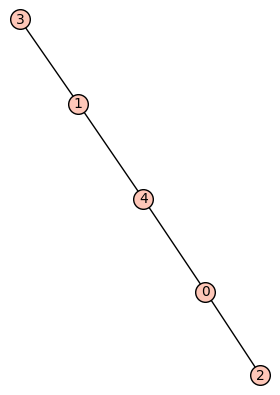

In [111]:
# Load the graph
g = Graph()
from_graph6(g, g6s)

# Show the graph
g.show()

## Are all paths with greater than 4 vertices not levelable?

In [13]:
print ("Is it levelable?")

for n in range(5,21):

    if is_levelable(graphs.PathGraph(n)):
        answer = "Yes"
    else:
        answer = "No"
        
    print "path on " + str(n) + " vertices: " + answer
    

Is it levelable?
path on 5 vertices: No
path on 6 vertices: No
path on 7 vertices: No
path on 8 vertices: No
path on 9 vertices: No
path on 10 vertices: No
path on 11 vertices: No
path on 12 vertices: No
path on 13 vertices: No
path on 14 vertices: No
path on 15 vertices: No
path on 16 vertices: No
path on 17 vertices: No
path on 18 vertices: No
path on 19 vertices: No
path on 20 vertices: No


## Do non-levelable graphs always have a path of length >4  embedded?

### Look at non-levelable graphs

We should expect that these DO have such paths.

In [74]:
df = pd.read_csv("results/resultsconnected8.csv")

# Get the index where the False occurs
indF = df.index[df.levelable == "F"]

# Randomly sample some 
ind = np.random.choice(indF, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    
    print s + "  "+ str(g.longest_path().order())

G?qfBw  8
GEhttk  8
G?qu^k  8
GCQuv{  8
GCQbQk  8
GEjv^{  8
GQjVNo  8
G?qbaw  8
GCZfVg  8
G?`fEo  8


### Look at levelable graphs

We should expect that these do not have such paths.

In [4]:
df = pd.read_csv("results/resultsconnected8.csv")

# Get the index where levelable is true
indT = df.index[df.levelable == "T"]

# Randomly sample some 
ind = np.random.choice(indT, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    
    print s + "  "+ str(g.longest_path().order())

GCOcf{  6
GCrVrw  8
G?B@vw  7
G?zvvW  8
GEv~t{  8
G?qdVc  8
GCZH{{  8
G?ABvs  6
GCzfZ{  8
GCpbb{  8


### Look at graphs with only short paths

In [10]:
shortPaths = pd.DataFrame(columns = ["graph6 string", "longest path", "levelable"] )

for g in graphs.nauty_geng(8):
    if g.longest_path().order() < 5:
        shortPaths = shortPaths.append({"graph6 string": g.graph6_string(),
                          "longest path": g.longest_path().order(),
                          "levelable": is_levelable(g)}, 
                         ignore_index = True)

NameError: name 'is_levelable' is not defined

In [107]:
shortPaths

,graph6 string,longest path,levelable
0,G?????,0,True
1,G???C?,2,True
2,G???E?,3,True
3,G???F?,3,True
4,G???F_,3,True
5,G???Fo,3,True
6,G???Fw,3,True
7,G???F{,3,True
8,G??CA?,2,True
9,G??CE?,4,True


In [23]:
# Are all graphs with short paths levelable?
sum(shortPaths['levelable']) == shortPaths.shape[0]

True

### Conjecture 1 (graphs without long paths are levelable)

Let $G$ be a graph on $n > 5$ vertices. If the longest path in $G$ is less than 5 vertices long, then $\textrm{ind}(G)$ is levelable.

## Regular graphs

It's definitely not true that levelable graphs are necessarily regular. 

As a counterexample, this graph (with graph6 string `G??FF{` is levelable but not regular:

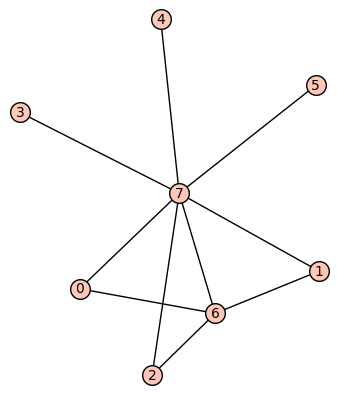

is levelable? True
is regular? False


In [63]:
g = Graph()
from_graph6(g, "G??FF{")

g.show()
print "is levelable? " + str(is_levelable(g))
print "is regular? " + str(g.is_regular())

### Are levelable graphs regular?

In [50]:
df = pd.read_csv("results/resultsconnected7.csv")

isRegular = pd.DataFrame(columns = ["graph6 string", "regular"])

for index, row in df.iterrows():
    g = Graph()
    from_graph6(g, row['graph6 string'])
    
    if g.is_regular():
        isRegular = isRegular.append({"graph6 string": row["graph6 string"], "regular":1}, ignore_index = True)
        
    elif not(g.is_regular()):
        isRegular = isRegular.append({"graph6 string": row["graph6 string"],"regular":0}, ignore_index = True)

In [57]:
df2 = df.merge(isRegular, on = "graph6 string")
df2[df2.regular == 1]

,graph6 string,levelable,minimized solution,regular
291,FCp`_,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
720,FFzvO,T,"[2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0]",1
816,FUzro,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
852,F~~~w,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
